In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import plotly.express as px

In [4]:
import plotly.graph_objects as go

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_theme(style="whitegrid")

In [8]:
data = pd.read_csv("C:/Users/denni/Documents/onlinefoods.csv")
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [9]:
# info about all columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


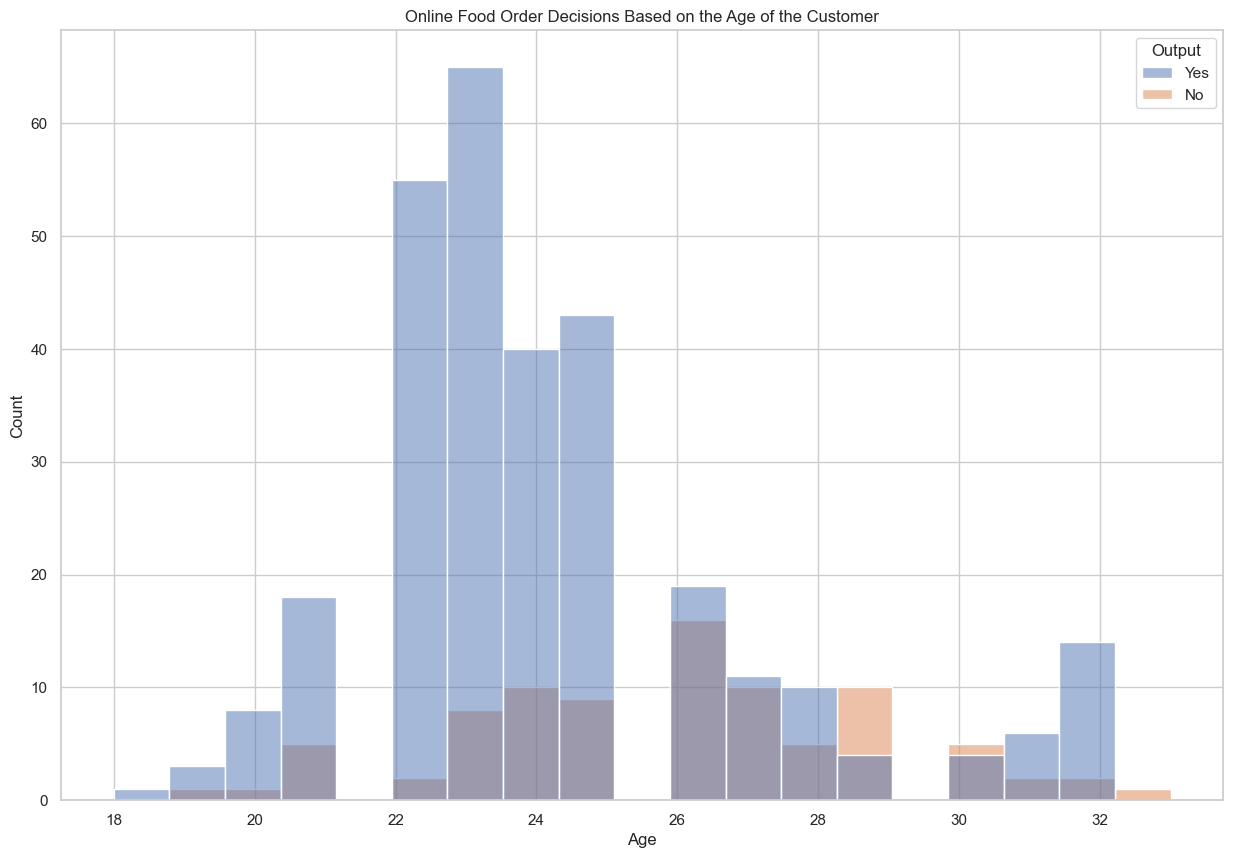

In [10]:
# visualization
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

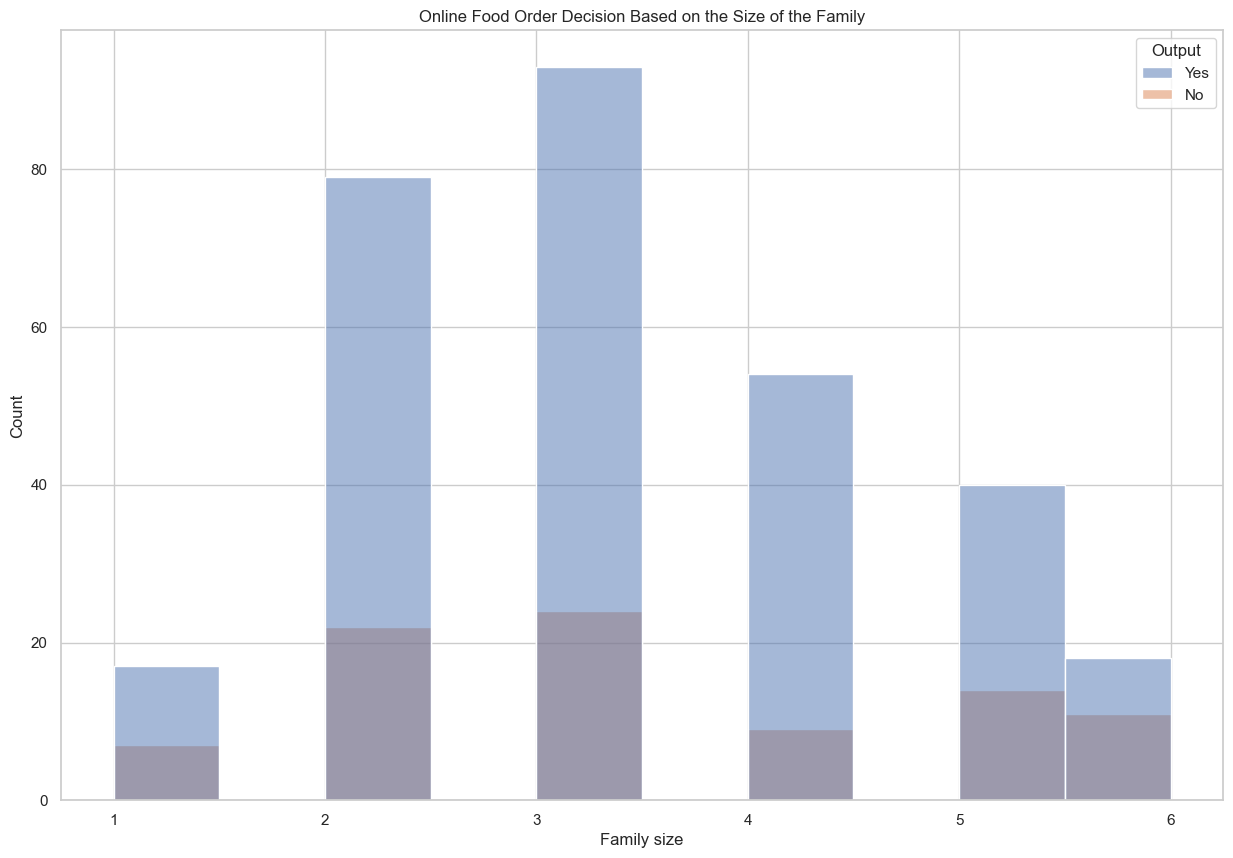

In [11]:
# online food order decisions based on the size of the family
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decision Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

In [12]:
# create a dataset of all the customers who ordered the food again
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [13]:
# Gender visualization to find out who orders food more online
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Order Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black',width=3)))
fig.show()

In [14]:
# Marital status of the customers who ordered again
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black',width=3)))
fig.show()

In [15]:
# Income group of the customers who ordered food again
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [16]:
# preparing data for training a machine learning model. Converting all the categorical features into numerical values
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2,
                                                     "Single": 1,
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Employed": 3,
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate":1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3,
                                                                             "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1         1.0               0   
1   24       0               1         1.0           10000   
2   22       1               1         1.0           10000   
3   22       0               1         1.0               0   
4   22       1               1         1.0           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes       1.0         Yes  
1    Yes       1.0         Yes  
2    Yes       NaN         Yes  
3    Yes       1.0         Yes  

In [17]:
# Split the data
from sklearn.model_selection import train_test_split

In [18]:
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [19]:
# Train the model
from sklearn.ensemble import HistGradientBoostingClassifier

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.10,random_state=42)

In [21]:
model = HistGradientBoostingClassifier()

In [22]:
model.fit(xtrain, ytrain)

c:\Users\denni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



HistGradientBoostingClassifier()

In [23]:
print(model.score(xtest, ytest))

0.9230769230769231


In [26]:
# A form to input the data of the customer and predict whether the customer will order the food again or not
print("Enter Customer Details to Predict If the Cutomer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negatve): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Cutomer Will Order Again
Finding if the customer will order again:  ['No']
